### Read the data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())

import tabularmagic as tm

df = pd.read_csv(f'{directory_path}/house_price_data/data.csv', 
                       index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


### Initialize an Analyzer object

In [2]:
analyzer = tm.Analyzer(df, test_size=0.2, name='Housing sale price data')
analyzer

INFO: Analyzer initialized for dataset 'Housing sale price data'. Shapes of train, test 
      DataFrames: (1168, 80), (292, 80). 


Housing sale price data 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
  'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
  'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
  'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
  'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                      

In [3]:
analyzer.load_data_checkpoint()
analyzer.eda('train').categorical_stats()

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test DataFrames: 
      (1168, 80), (292, 80). 


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,3,4,5,6,4,4,4,6,6,6,5,2,4,4,7,5,6,3,5,5,3,3,4,4,9,6
most_common,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
least_common,C (all),Grvl,Pave,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRNn,2fmCon,2.5Fin,Shed,Metal,ImStucc,Other,BrkCmn,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,FuseP,Fa,Sev,Po,2Types,Fin,Po,Ex,P,Fa,MnWw,TenC,Oth,AdjLand
n_missing,0,0,1094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,683,0,0,0,28,28,28,28,28,0,0,0,1,0,0,547,64,64,64,64,0,1162,935,1122,0,0
missing_rate,0.0,0.0,0.936644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58476,0.0,0.0,0.0,0.023973,0.023973,0.023973,0.023973,0.023973,0.0,0.0,0.0,0.000856,0.0,0.0,0.468322,0.054795,0.054795,0.054795,0.054795,0.0,0.994863,0.800514,0.960616,0.0,0.0
n,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168


In [4]:
analyzer.load_data_checkpoint()
analyzer.drop_highly_missing_vars(0.532)

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test DataFrames: 
      (1168, 80), (292, 80). 
INFO: Dropped variables 'MasVnrType', 'MiscFeature', 'Fence', 'Alley', 'PoolQC' with at 
      least 53.2% of values missing. 


Housing sale price data 
----------------------------------------------------------------------------------------
Train shape: (1168, 75)                      Test shape: (292, 75)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
  'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 
  'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
  'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
  'SaleType', 'SaleCondition' 
                                                                                        
Numeric variables:
  'MSSubClass', 'LotFrontage', 'Lot

### Predict sale price

In [5]:
tm.options.print_options.unmute()

In [6]:
analyzer.load_data_checkpoint()
analyzer.scale().drop_highly_missing_vars().impute()
mlreg_report = analyzer.regress(
    models=[
        tm.ml.LinearR(
            'ols',
            feature_selectors=[
                tm.fs.LassoFSR(max_n_features=3),
                tm.fs.KBestFSR(scorer='f_regression', k=3)
            ]
        ),
        tm.ml.LinearR('l1'), 
        tm.ml.LinearR('l2', name="hellooooooooooooooo"), 
        tm.ml.TreesR(
            'decision_tree',
        )
    ],
    target='SalePrice',
    predictors=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 'LotFrontage'],
)

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test DataFrames: 
      (1168, 80), (292, 80). 
INFO: Scaled variables 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
      'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
      'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
      '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice' 
      using strategy 'standardize'. 
INFO: Dropped variables 'MasVnrType', 'MiscFeature', 'Fence', 'Alley', 'PoolQC' with at 
      least 50.0% of values missing. 
INFO: Imputed missing values with strategy 'median' for numeric variables 'MSSubClass', 
      'LotFrontage', 'LotArea', 'OverallQual', 'O

In [7]:
mlreg_report

ML Regression Report
----------------------------------------------------------------------------------------
Target variable:
  'SalePrice' 
                                                                                        
Predictor variables:
  'SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 'LotFrontage' 
                                                                                        
Models evaluated:
  'LinearR(ols)', 'LinearR(l1)', 'hellooooooooooooooo', 'TreesR(decision_tree)' 
                                                                                        
Feature selectors:
  None 
----------------------------------------------------------------------------------------
Best models:
  1. 'LinearR(ols)'                          Test RMSE: 47508.68299 
  2. 'hellooooooooooooooo'                   Test RMSE: 47717.19569 
  3. 'LinearR(l1)'                           Test RMSE: 47829.94177 

In [8]:
import joblib

pipeline = mlreg_report.model('LinearR(ols)').sklearn_pipeline()
joblib.dump(pipeline, 'ignored/house_pipeline.joblib')

['ignored/house_pipeline.joblib']

In [9]:
pipelien = joblib.load('ignored/house_pipeline.joblib')
pipeline.predict(df)

array([ 0.37507908, -0.07611359,  0.42938548, ...,  0.38791498,
       -0.64320551, -0.61389526])

In [16]:
mlreg_report.metrics('test')

,LinearR(ols),LinearR(l1),hellooooooooooooooo,TreesR(decision_tree)
Statistic,,,,
rmse,47508.682986,47829.941775,47717.195687,50064.080836
mae,30187.007072,30146.141299,30210.347685,30536.576319
mape,0.181735,0.181599,0.182423,0.186335
pearsonr,0.847138,0.846133,0.846546,0.824992
spearmanr,0.874703,0.874315,0.870494,0.834421
r2,0.705739,0.701746,0.703151,0.673233
n_obs,292,292,292,292


In [9]:
print(mlreg_report)

ML Regression Report
----------------------------------------------------------------------------------------
Target variable:
  'SalePrice' 
                                                                                        
Predictor variables:
  'SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 'LotFrontage' 
                                                                                        
Models evaluated:
  'LinearR(ols)', 'LinearR(l1)', 'hellooooooooooooooo', 'TreesR(decision_tree)' 
                                                                                        
Feature selectors:
  None 
----------------------------------------------------------------------------------------
Best models:
  1. 'LinearR(ols)'                          Test RMSE: 47508.683 
  2. 'hellooooooooooooooo'                   Test RMSE: 47710.901 
  3. 'LinearR(l1)'                           Test RMSE: 47864.594 


In [9]:
mlreg_report.model('LinearR(ols)').fs_report().votes()

,LassoFSR,KBestFSR(f_regression)
AdjLand_yn(SaleCondition),False,False
Alloca_yn(SaleCondition),False,False
Family_yn(SaleCondition),False,False
Normal_yn(SaleCondition),False,False
Partial_yn(SaleCondition),False,True
YrSold,False,False
OverallQual,False,True
LotArea,True,False
LotFrontage,True,True


In [12]:
analyzer

Housing sale price data 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
  'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
  'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
  'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
  'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                      

### View results

In [8]:
mlreg_report.metrics('train')

,LinearR(ols),LinearR(l1),LinearR(l2),TreeEnsembleR(adaboost)
Statistic,,,,
rmse,44430.156982,44224.106367,44242.930289,33488.468981
mad,30775.043841,30677.361137,30655.227085,24404.506064
pearsonr,0.817948,0.819818,0.81965,0.901569
spearmanr,0.847471,0.851376,0.850438,0.874417
r2,0.669038,0.672101,0.671822,0.811976
n_obs,1168,1168,1168,1168


In [9]:
mlreg_report.metrics('test')

,LinearR(ols),LinearR(l1),LinearR(l2),TreeEnsembleR(adaboost)
Statistic,,,,
rmse,47508.682986,47864.594103,47710.901103,42978.964149
mad,30187.007072,30562.622497,30361.070804,28109.317264
pearsonr,0.847138,0.844295,0.84583,0.879485
spearmanr,0.874703,0.868388,0.86999,0.873333
r2,0.705739,0.701314,0.703229,0.759177
n_obs,292,292,292,292


View model-specific predictors

In [10]:
mlreg_report.model('LinearR(ols)').predictors()

['Partial_yn(SaleCondition)', 'OverallQual', 'LotArea', 'LotFrontage']

In [11]:
mlreg_report.model('LinearR(ols)').fs_report().votes()

,LassoFSR,KBestFSR(f_regression)
AdjLand_yn(SaleCondition),False,False
Alloca_yn(SaleCondition),False,False
Family_yn(SaleCondition),False,False
Normal_yn(SaleCondition),False,False
Partial_yn(SaleCondition),False,True
YrSold,False,False
OverallQual,False,True
LotArea,True,False
LotFrontage,True,True


In [16]:
mlreg_report.model('LinearR(l2)').feature_importance()

,Abs Coefs
Feature,
AdjLand_yn(SaleCondition),9599.624435
Alloca_yn(SaleCondition),27829.610099
Family_yn(SaleCondition),11949.225451
Normal_yn(SaleCondition),3908.696220
Partial_yn(SaleCondition),31833.953486
YrSold,753.746012
OverallQual,40403.979871
LotArea,1.186988
LotFrontage,289.884981


In [12]:
mlreg_report.model('TreeEnsembleR(adaboost)').predictors()

['OverallQual', 'LotArea', 'LotFrontage']

In [13]:
mlreg_report.model('TreeEnsembleR(adaboost)').feature_importance()

,Importance
Feature,
OverallQual,0.805872
LotArea,0.134024
LotFrontage,0.060104


In [16]:
mlreg_report.model('TreeEnsembleR(adaboost)').fs_report().votes()

,BorutaFSR
AdjLand_yn(SaleCondition),False
Alloca_yn(SaleCondition),False
Family_yn(SaleCondition),False
Normal_yn(SaleCondition),False
Partial_yn(SaleCondition),False
YrSold,False
OverallQual,True
LotArea,True
LotFrontage,True


Obtain the savable sklearn pipeline

In [18]:
mlreg_report.model('TreeEnsembleR(adaboost)').sklearn_pipeline()

Pipeline(steps=[('custom_prep_data',
                 FunctionTransformer(check_inverse=False,
                                     func=<bound method DataEmitter.custom_transform of <tabularmagic._src.data.datahandler.DataEmitter object at 0x3066a2350>>)),
                ('feature_selector',
                 ColumnSelector(columns=['Alloca_yn(SaleCondition)',
                                         'Partial_yn(SaleCondition)',
                                         'OverallQual'])),
                ('model',
                 OptunaSearchCV(cv=KFold(n_split...
                                param_distributions={'estimator': CategoricalDistribution(choices=(DecisionTreeRegressor(max_depth=3, random_state=42), DecisionTreeRegressor(max_depth=5, random_state=42), DecisionTreeRegressor(max_depth=8, random_state=42), DecisionTreeRegressor(max_depth=12, random_state=42))),
                                                     'learning_rate': FloatDistribution(high=1.0, log=True, low=0.001, step=None),
                                                     'n_estimators': CategoricalDistribution(choices=(50, 100, 200))},
                                random_state=43))])

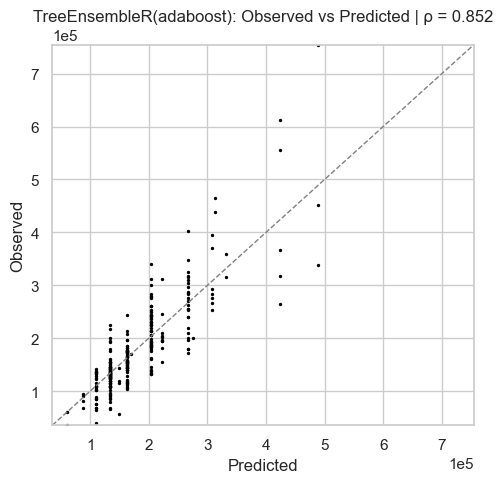

In [19]:
mlreg_report.plot_obs_vs_pred('TreeEnsembleR(adaboost)', 'test')